## Prediction of coverage from Tilt,VB and Height.

#### import numpy and pandas

In [1]:
import numpy as np
import pandas as pd

#### set your working directory

In [2]:
import os
os.chdir('/Users/snigdhashukla/Documents/freelancer/lalit_work')

#### load dataset in jupytetnotebook as data

In [3]:
data=pd.read_csv("data.csv")
data.drop(data.columns[[0]], axis=1, inplace=True)

In [4]:
data

,site,Height,VB,Tilt,Coverage
0,A,60,5,0,10000.0
1,B,60,5,1,10000.0
2,C,60,5,2,10000.0
3,D,60,5,3,6875.0
4,E,60,5,4,2291.0
...,...,...,...,...,...
227,GR,50,9,6,1909.0
228,GS,50,9,7,1145.0
229,GT,50,9,8,817.0
230,GU,50,9,9,635.0


#### Get information about dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 5 columns):
site        232 non-null object
Height      232 non-null int64
VB          232 non-null int64
Tilt        232 non-null int64
Coverage    211 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 9.2+ KB


#### The data set contains 232 rows (entries) and 5 columns (site, Height,VB , Tilt and coverage). Column coverage has some missing values.

#### 

In [6]:
# check column wise missing values
data.isnull().sum()

site         0
Height       0
VB           0
Tilt         0
Coverage    21
dtype: int64

#### only dependent variable "coverage" has 21 missing values. 



In [7]:
#replace missing values with maximum value of combination of VB and Height.
data["Coverage"]=data.groupby(["Height","VB"])["Coverage"].transform(lambda x:x.fillna(x.max()))

In [8]:
#check again
data.isnull().sum()

site        0
Height      0
VB          0
Tilt        0
Coverage    0
dtype: int64

#### Now no missing values in any column of the dataset

In [9]:
# get mean ,count,standard deviation, min,max and 25,50,75 percentile of numeric variables
data.describe()

,Height,VB,Tilt,Coverage
count,232.000000,232.000000,232.000000,232.000000
mean,39.827586,6.000000,5.336207,2271.206897
std,14.353771,2.194049,3.408530,2370.668025
min,20.000000,3.000000,0.000000,43.000000
25%,30.000000,5.000000,2.000000,438.000000
50%,40.000000,6.000000,5.000000,980.000000
75%,50.000000,7.000000,8.000000,3500.000000
max,60.000000,9.000000,12.000000,10000.000000


### Data Visualisation 

#### Data visulisation is done in two step
(1) Univariate Anlysis- Each variable is visualized  seperatly without respect of any other variable.
(2)Bi-variate Analysis -Each Independent variable is visualized with respect to target variable and then with each other. 

### Univariate Analysis

In [10]:
# import require packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

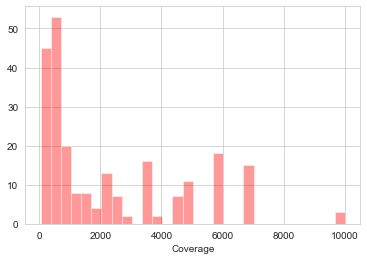

In [11]:
#Distributiom plot of target variable "coverage".
sns.distplot(data['Coverage'],bins=30,kde=False,color='red')

#### Coverage is not normally distributed. Most of the values are in between 0 to 2000. 10000 is extreme value

In [12]:
#check the number of occurance of 10000 in dataset
len(data[data["Coverage"]==10000])

3

#### only three times coverage has value 10000 therefore coming as outlier and it should be removed in model building.

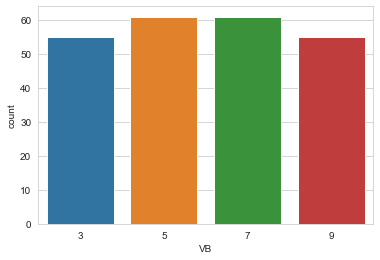

In [13]:
# count plot for "VB" means frequency for each values of "VB"
sns.countplot(x='VB',data=data)

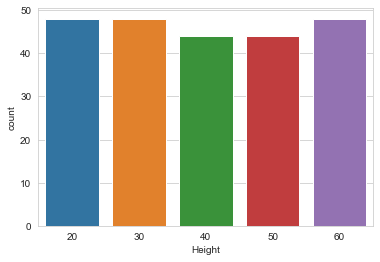

In [14]:
sns.countplot(data["Height"])

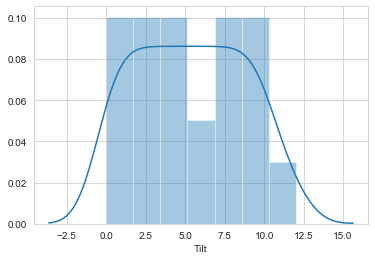

In [15]:
sns.distplot(data["Tilt"])

### Bi-variate analysis

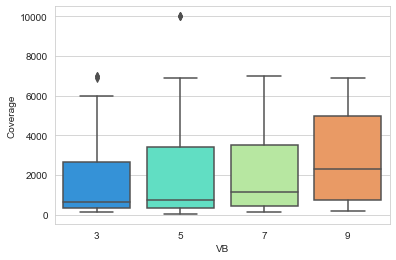

In [16]:
# Boxplot of 'coverage' with each unique value of "VB"
sns.boxplot(x='VB',y='Coverage',data=data,palette='rainbow')

####  The boxplot shows that the mean value of coverage is maximum with VB=9 and minimum with VB=3.Increasing linearly

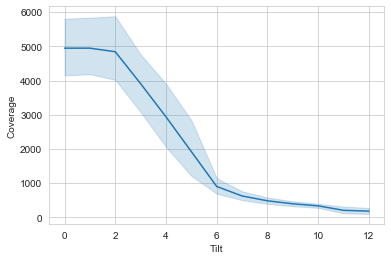

In [17]:
#lineplot of coverage with respect to Tilt
sns.lineplot(x="Tilt", y="Coverage", data=data)

#### the graph between tilt and coverage showing that from tilt equal to 0 to 2 ,the coverage is constant then decreased linearly from tilt 2 to 6 afterward goes slowly down or constant.

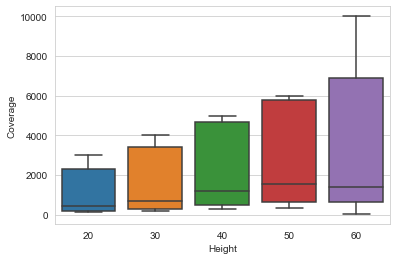

In [289]:
# Boxplot of coverage with respect to Height.
sns.boxplot(x="Height", y="Coverage", data=data)

#### mean value of coverage is increasing with Height.

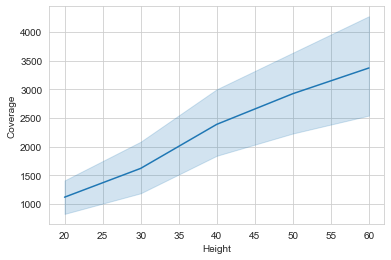

In [290]:
# lineplot of coverage with respect to height
sns.lineplot(x="Height", y="Coverage", data=data)

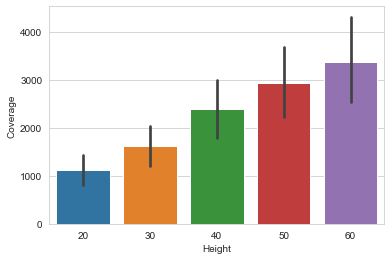

In [291]:
#Barplot of coverage with respect to Height.
sns.barplot(x="Height",y="Coverage",data=data)

#### All three plots show approx direct linear relationship of coverage with height..the count as well as mean value of coverage is increased with respect to height.

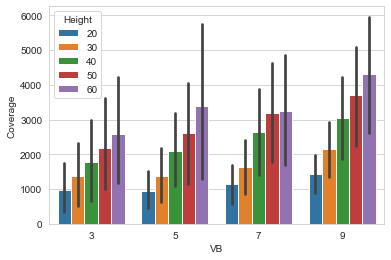

In [292]:
#Barplot of "VB" vs "coverage" with each "Height"
sns.barplot(x="VB",y="Coverage",data=data,hue="Height")

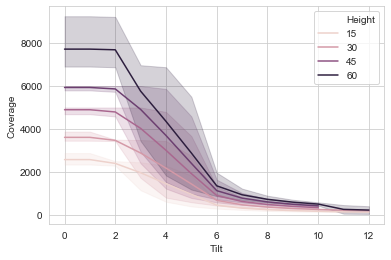

In [293]:
# lineplot of Tilt vs coverage with each "HEight"
sns.lineplot(x="Tilt",y="Coverage",data=data,hue="Height")

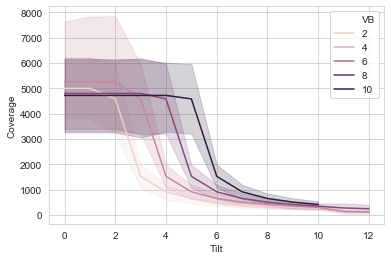

In [295]:
sns.lineplot(x="Tilt",y="Coverage",data=data,hue="VB")

### correlation of each independent variables and dependent variable.

Text(0.5, 1, 'data.corr()')

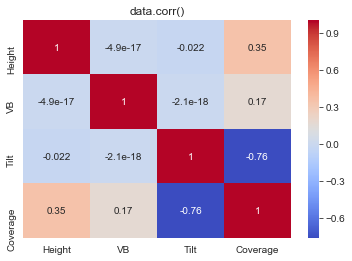

In [296]:
#heat map to show how variables are correlated with each other.
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)
plt.title('data.corr()')

#### The head map shows that the tilt is highly correlated with coverage(0.76) and independent variables are not correlated with each other as coeffient value is very low.

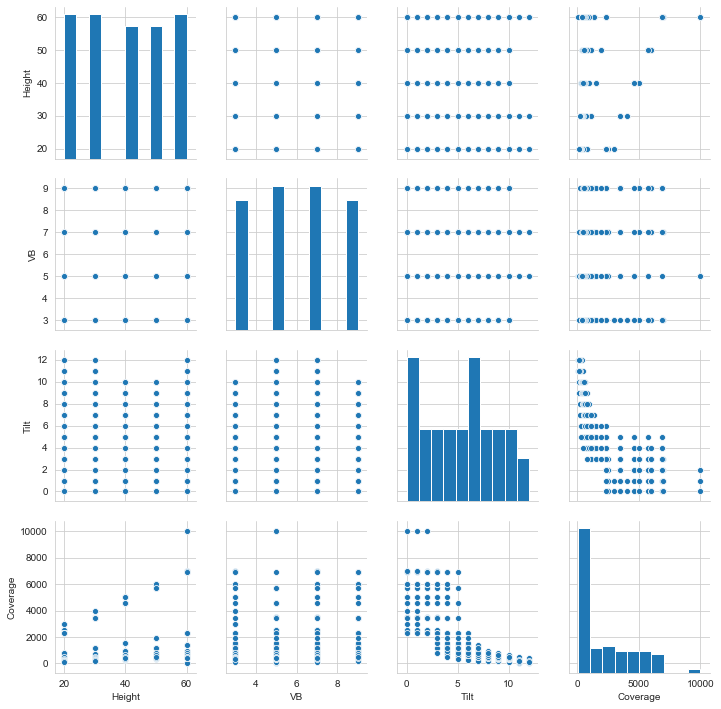

In [297]:
#pair plot shows the graph between each variables.
sns.pairplot(data)

### Train-Test split

#### The entire dataset is split in two dataset train and test in 7:3 ratio respectively. Train dataset is used to build the model and test dataset is to validate the model.

In [12]:
# remove the outliers (row with coverage =10000)
data=data[data["Coverage"]!=10000]

In [13]:
# independent variables which are needed to build the model.
x=data[["Height","VB","Tilt"]]

In [14]:
# put y as dependent variable( coverage)
y=data["Coverage"]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# tuple unpacking to seperate train and test data
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=101)

#### x_train 70 percent of dataset with independent variables only
#### y_train 70 percent of dataset with dependent variable (coverage) only
#### x_test 30 percent of dataset with independent variables only
#### y_test 30 percent of dataset with dependent variable (coverage) only

### Model Building 

### Random forest Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor 
  

In [27]:
# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [28]:
regressor.fit(x_train, y_train)   

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [306]:
# get predicted value of coverage from the model by using test data. y_pred is predicted value of coverage in test data set.
y_pred = regressor.predict(x_test)

In [35]:
## to test with new value
new_number= [[45,5.5,4]]
  
# Create the pandas DataFrame 
data_new = pd.DataFrame(new_number, columns = ['Height', 'VB','Tilt']) 
new_predict=regressor.predict(x_test)
  

In [307]:
# the real value of target variable in test data set is y_test.

### Validation

### Fitted vs actual curve

In [308]:
#### for a good model the graph between predicted value and true value should be linear 

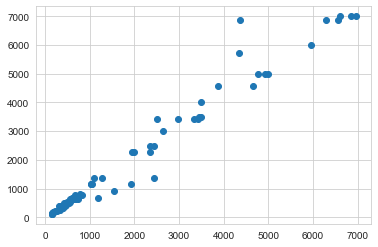

In [309]:
# scatter plot between predicted and actual value of target variable.
plt.scatter(y_pred,y_test)

#### The graph between true and predicted value is almost linear except few points. That's a good sign

### Rsquare

In [310]:
#### second method to validate is to check R square . For a good model R square should be high

In [311]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.9581059162026115

#### R square is .958 that means model is working good

In [312]:
# other metrics are mean sqaure error, mean absolute error and root mean square error.
# mean square error
metrics.mean_squared_error(y_test, y_pred)
    

199165.7291362319

In [313]:
# mean absolute error
metrics.mean_absolute_error(y_test,y_pred)

217.63971014492753

In [314]:
# root mean square error
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

446.27987758382284

### Result -The fitted vs actual curve and R square showing our model is working good

## Check the same model with train dataset just to check  if the results are almost same or not.


In [315]:
train_y_pred = regressor.predict(x_train)

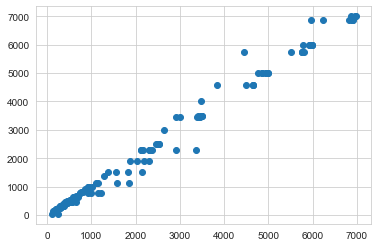

In [316]:
plt.scatter(train_y_pred,y_train)

In [317]:
#### now the same kind of straight line is coming with train data also. similarly R square
metrics.r2_score(y_train, train_y_pred)

0.9895826673621783

####  simliarly we are getting good and approx same r square value with train data also.This means our model is working same as test and train

#### svm


In [20]:
from sklearn.svm import SVR

clf = SVR(gamma='scale')
clf.fit(x_train, y_train) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [23]:
predict=clf.predict(x_test)

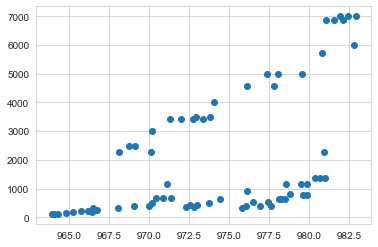

In [24]:
plt.scatter(predict,y_test)

In [25]:
from sklearn.neighbors import KNeighborsRegressor

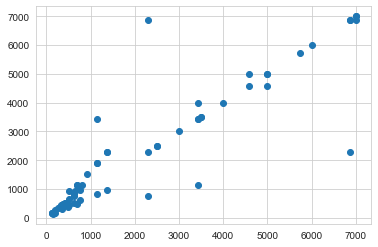

In [29]:
clf=KNeighborsRegressor(1)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
plt.scatter(y_test,y_pred)

#### decision tree

In [17]:

from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [18]:
prediction=regressor.predict(x_test)

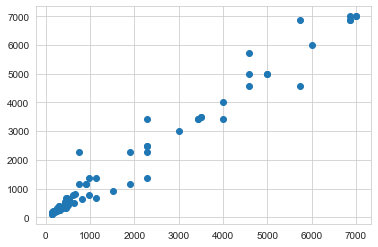

In [19]:
plt.scatter(prediction,y_test)

In [20]:
from sklearn import metrics
metrics.r2_score(y_test, prediction)

0.9659772253167798